In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

df = pd.read_csv("Iris.csv").sample(frac=1)

X, y = df[df.columns[1:-1]], df.Species

In [2]:
df.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [3]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
142,143,5.8,2.7,5.1,1.9,Iris-virginica
17,18,5.1,3.5,1.4,0.3,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
70,71,5.9,3.2,4.8,1.8,Iris-versicolor
79,80,5.7,2.6,3.5,1.0,Iris-versicolor


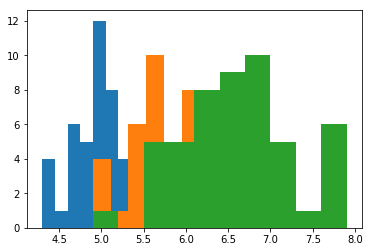

SepalLengthCm


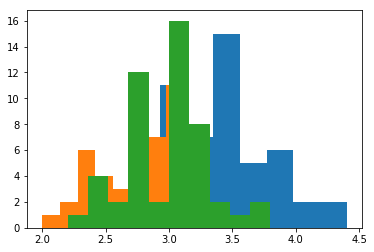

SepalWidthCm


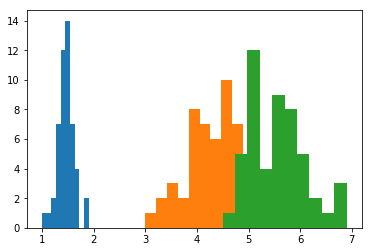

PetalLengthCm


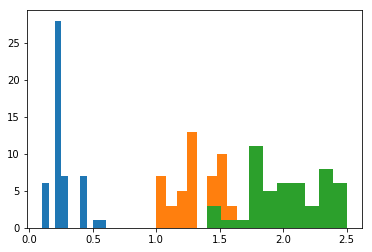

PetalWidthCm


In [4]:
for f in df.columns[1:-1]:
    plt.hist(df[df.Species=='Iris-setosa'][f])
    plt.hist(df[df.Species=='Iris-versicolor'][f])
    plt.hist(df[df.Species=='Iris-virginica'][f])
    plt.show()
    print(f)

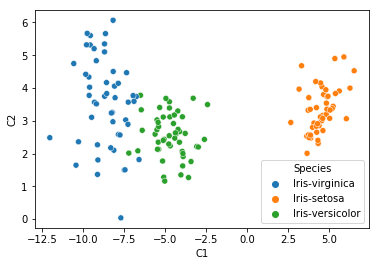

In [8]:
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(shrinkage="auto", solver="eigen").fit(X, y)
df["C1"], df["C2"] = clf.transform(X)[:,0], clf.transform(X)[:,1]
y_hat = clf.predict(X)

sns.scatterplot(x='C1', y='C2', data=df, hue='Species')
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_hat)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [18]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier(strategy="most_frequent").fit(X, y)
dc.score(X, y)

0.3333333333333333

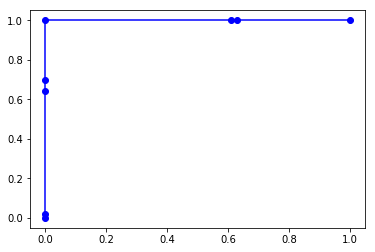

In [10]:
from sklearn.linear_model import LogisticRegression

y_ = y=="Iris-setosa"
lr = LogisticRegression().fit(X, y_)
y_score = lr.predict_proba(X)[:,1]

from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_, y_score)
plt.plot(fpr, tpr, 'bo-')
plt.show()

In [11]:
lr = LogisticRegression().fit(X, y)
y_scores = lr.predict_proba(X)

from sklearn.metrics import roc_auc_score, SCORERS

roc_auc_score(y, y_scores, multi_class='ovr')

0.9983333333333334

In [22]:
from sklearn.model_selection import cross_val_score

# cross_val_score(lr, X, y, cv=5, scoring="roc_auc_ovr")

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100, 
    max_features='sqrt',
    criterion='gini',
    oob_score=True,
    max_samples=.5
).fit(X, y)

rf.oob_score_

0.9533333333333334

In [23]:
?RandomForestClassifier